In [1]:
#import things we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap
import seaborn as sns
from scipy.stats import zscore

# Load data, rotate as needed, join dataframes together for ease of processing later

In [2]:
set_metric='euclidean'

In [3]:
#import  data (all DA cells)
controldf = pd.read_excel(r'data/allDA2.xlsx',sheet_name='all DA cells (2)',nrows=9)
colnames=controldf.columns
druglikecontroldf = pd.read_excel(r'data/allDA2.xlsx',sheet_name='all DA cells (2)',skiprows=10,nrows=9,names=colnames)
drugdiffcontroldf = pd.read_excel(r'data/allDA2.xlsx',sheet_name='all DA cells (2)',skiprows=21,nrows=31,names=colnames)
controldf['condition']='controls'
druglikecontroldf['condition']='drugs like controls'
drugdiffcontroldf['condition']='drugs different from controls'
controldf['condition_num']=list(range(len(controldf['condition'])))
druglikecontroldf['condition_num']=list(range(len(druglikecontroldf['condition'])))
drugdiffcontroldf['condition_num']=list(range(len(drugdiffcontroldf['condition'])))

In [4]:
# controldf
# druglikecontroldf
drugdiffcontroldf

,Controls:,total,%Cortex,%NAcMed,%NAcLat,%NAcCore,%DStr,%VP,%PO,%Septum,...,%MHb,%CeA,%LH,%ZI,%DR,%LDT,%PBN,%DCN,condition,condition_num
0,caff 3,11598,3.336782,6.777031,2.586653,5.819969,11.200207,4.733575,1.707191,0.413864,...,0.413864,3.259183,5.613037,3.362649,15.623383,2.103811,12.898776,0.465598,drugs different from controls,0
1,caff 4,41072,6.055220,4.755064,3.951597,6.508083,17.815056,4.952279,3.520647,0.555123,...,0.693903,4.280288,5.142189,5.003409,11.350799,2.137709,6.851383,0.547818,drugs different from controls,1
2,coc 2,6318,3.656220,2.564103,4.985755,6.457740,19.705603,6.790123,3.513770,0.332384,...,2.469136,2.754036,3.466287,3.513770,11.680912,0.664767,3.846154,1.566952,drugs different from controls,2
3,coc 3,17537,5.576781,2.651537,7.219023,7.766437,21.309232,4.681530,1.613731,0.450476,...,1.300108,4.293779,8.724411,3.660831,5.200433,0.900952,2.052803,0.478987,drugs different from controls,3
4,coc 4,4753,4.670734,1.641069,2.398485,1.262361,3.282138,9.404587,3.597728,0.063118,...,0.820534,5.049442,8.457816,6.627393,23.543025,1.220282,4.860088,0.946770,drugs different from controls,4
5,coc 5,7552,3.297140,4.290254,2.343750,6.475106,3.813559,9.494174,5.601165,1.827331,...,3.336864,2.701271,4.131356,3.376589,18.114407,1.006356,5.164195,1.469809,drugs different from controls,5
6,ket 1,18304,3.458260,5.113636,4.572771,4.736670,4.458042,11.161495,6.244537,3.114073,...,3.605769,2.769886,8.686626,4.851399,9.866696,1.300262,6.621503,0.508086,drugs different from controls,6
7,ket2,16390,4.539353,5.564369,4.795607,5.491153,6.314826,11.000610,5.289811,0.787065,...,2.837096,2.397804,8.419768,5.564369,11.147041,0.701647,4.557657,0.658938,drugs different from controls,7
8,ket 3,16645,1.838390,7.768099,6.650646,11.282667,27.053169,5.893662,3.045960,0.288375,...,0.612797,1.766296,4.235506,5.551217,6.109943,0.312406,2.973866,0.486633,drugs different from controls,8
9,ket 4,36266,2.448574,6.700491,3.722495,4.963327,11.986434,11.928528,5.062593,1.381459,...,5.219765,2.638835,7.949595,3.904484,9.860475,0.799647,3.879667,0.901671,drugs different from controls,9


# Define some functions, variables, and other things we will use

In [5]:
uniq_colors=['mediumorchid','gray','royalblue','darkred','red','hotpink',
             'khaki','palegreen','seagreen','orange','lavender',
             'steelblue','navy','dodgerblue','thistle','violet',
             'deeppink','pink','slateblue','peru','darkorange',
             'magenta','cyan','lightcoral','lawngreen',
             'burlywood'] # to use later

In [6]:
def signif(x, p): #get p significant digits of all of a numpy array (why does base numpy not have this...)
    x = np.asarray(x)
    x_positive = np.where(np.isfinite(x) & (x != 0), np.abs(x), 10**(p-1))
    mags = 10 ** (p - 1 - np.floor(np.log10(x_positive)))
    return np.round(x * mags) / mags

In [7]:
def plot_components(components_df,condition_nums): #plot feature importance of the PCA components 1-5
    #code adapted from 
    #https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
    fig, ax = plt.subplots(figsize=(8, 30))
    comptemp0=components_df.transpose()
    comptemp1=comptemp0.to_numpy()
    comptemp=signif(comptemp1,3)
    im = ax.imshow(comptemp)
    pca5=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5']
    regions=components_df.columns
    # We want to show all ticks...
    ax.set_xticks(np.arange(len(pca5)))
    ax.set_yticks(np.arange(len(regions)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(pca5)
    ax.set_yticklabels(condition_nums)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fig.colorbar(im)

    # Loop over data dimensions and create text annotations.
    for i in range(len(regions)):
        for j in range(len(pca5)):
            text = ax.text(j, i, comptemp[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Components and Feature Importance")
    fig.tight_layout()
    plt.show()

In [8]:
def make_pca_plots(pc1,pc2,pc3,labels): #makes plots of pc1v2, 1v3, and 2v3
    align_embed= pd.DataFrame({'pc1': pc1.values,'pc2': pc2.values,'pc3': pc3.values},index=labels)
    fig, ax = plt.subplots(figsize=(8, 6)) #init  fig
    for i,r in enumerate(np.unique(align_embed.index.values)):
        drug1=align_embed[align_embed.index == r]
        ax.scatter(drug1['pc1'],drug1['pc2'],c=uniq_colors[i],label=r)
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
    ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
    plt.show()
    fig, ax = plt.subplots(figsize=(8, 6)) #init  fig
    for i,r in enumerate(np.unique(align_embed.index.values)):
        drug1=align_embed[align_embed.index == r]
        ax.scatter(drug1['pc1'],drug1['pc3'],c=uniq_colors[i],label=r)
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 3')
    ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
    plt.show()
    fig, ax = plt.subplots(figsize=(8, 6)) #init  fig
    for i,r in enumerate(np.unique(align_embed.index.values)):
        drug1=align_embed[align_embed.index == r]
        ax.scatter(drug1['pc2'],drug1['pc3'],c=uniq_colors[i],label=r)
        ax.set_xlabel('PC 2')
        ax.set_ylabel('PC 3')
    ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
    plt.show()

In [9]:
def get_feats_and_labels(dataframe): #gets features and conditions (drugs) and brain regions
    regions=dataframe['condition'].values
    condition_nums=dataframe['condition_num'].values
    features0=dataframe.iloc[: , 2:24]
    features=features0.transpose()
    labels=features.index
    return features, labels, regions, condition_nums

In [10]:
#modularized pieter's code
def umap_n_times(X_scaled,labels,N = 20,n_neighbors=15,metric='euclidean'):
    umap_distances = np.zeros((len(labels),len(labels),N,))
    for n in range(0,N):
        embedding=umap.UMAP(n_neighbors=n_neighbors,metric=metric).fit_transform(X_scaled)
        for r1 in range(0,len(labels)):
            for r2 in range(0,len(labels)):
                d = np.sum((embedding[r1]-embedding[r2])**2)**(0.5)
                umap_distances[r1,r2,n]=d
        max_distance = np.max(umap_distances[:,:,n])
        umap_distances[:,:,n] = umap_distances[:,:,n]/max_distance
    umap_distances_means = np.mean(umap_distances,axis=2)
    return umap_distances_means

In [11]:
#modularized pieter's code
def umap_dist_heatmap(t1,indexed='no'):
    if indexed=='yes':
        labs=labels.values
        uniq=list(range(len(labels)))
        uniq_labels = [str(i) +'_'+ str(j) for i, j in zip(labs, uniq)]
    else:
        labs=labels.values
        uniq=[x[1] for x in labels.index.values]
        uniq_labels = [str(i) +'_'+ str(j) for i, j in zip(labs, uniq)]
    fig,ax =plt.subplots(figsize=(10,4))
    plt.pcolor(t1, cmap="RdYlBu_r")

    plt.yticks(np.arange(0.5, len(uniq_labels), 1),uniq_labels)
    plt.xticks(np.arange(0.5, len(uniq_labels), 1),uniq_labels)
    plt.colorbar()
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.show()

In [12]:
#modularized pieter's code
def pca_distance(pc1,pc2,pc3,labels):
    pca_distances = np.zeros((len(labels),len(labels)))
    for r1 in range(0,len(labels)):
        for r2 in range(0,len(labels)):
            d = ((pc1[r1]-pc1[r2])**2 +(pc2[r1]-pc2[r2])**2+(pc3[r1]-pc3[r2])**2)**(0.5)
            pca_distances[r1,r2]=d #euclidean distance
    max_distance = np.max(pca_distances[:,:])
    pca_distances[:,:] = pca_distances[:,:]/max_distance #normalized
    return pca_distances

# Controls

In [13]:
# controldf
# druglikecontroldf
# drugdiffcontroldf
features, labels, regions, condition_nums = get_feats_and_labels(controldf)
#scale X 
X=features.to_numpy().astype(float)
#get rid of NAs before scaling 
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0) 

In [14]:
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[2.19888775 1.78576378 1.6052153  1.42342374 0.91631512]


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-0.497782,1.626009,0.294474,1.923297,0.435337
1,-0.297975,-2.137279,-0.096663,-0.036746,-1.053147
2,-2.364076,-1.480598,-0.314134,0.570096,-0.008498
3,-0.871909,-1.271994,-1.615254,-1.706551,0.706464
4,-2.346396,1.184045,-0.077091,-0.983097,0.708064
5,0.431753,-0.576113,1.881609,1.531118,0.170070
6,1.512568,-0.131761,1.621711,0.410297,0.340985
7,1.112677,-1.895925,1.941891,-0.620158,0.880654
8,0.419506,-0.036090,2.503033,-0.254106,-0.488401
9,1.126386,1.724796,0.235900,-0.487516,-0.308843


### PCA plots

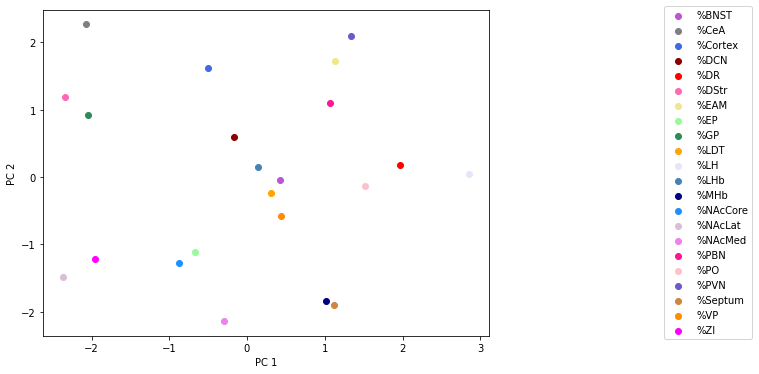

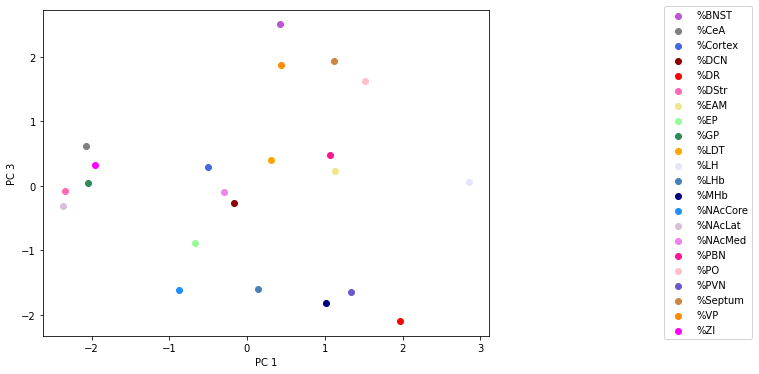

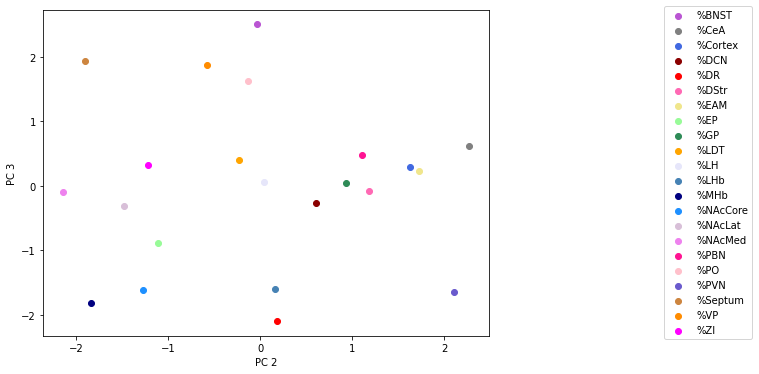

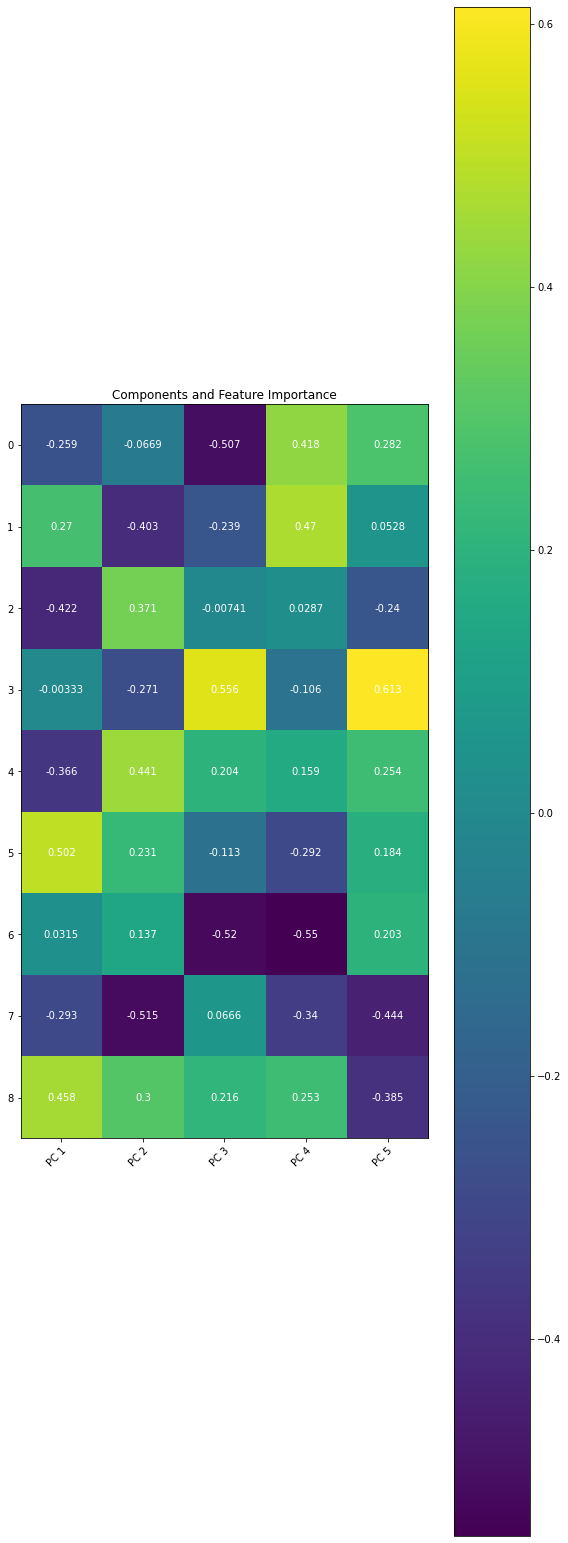

In [15]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


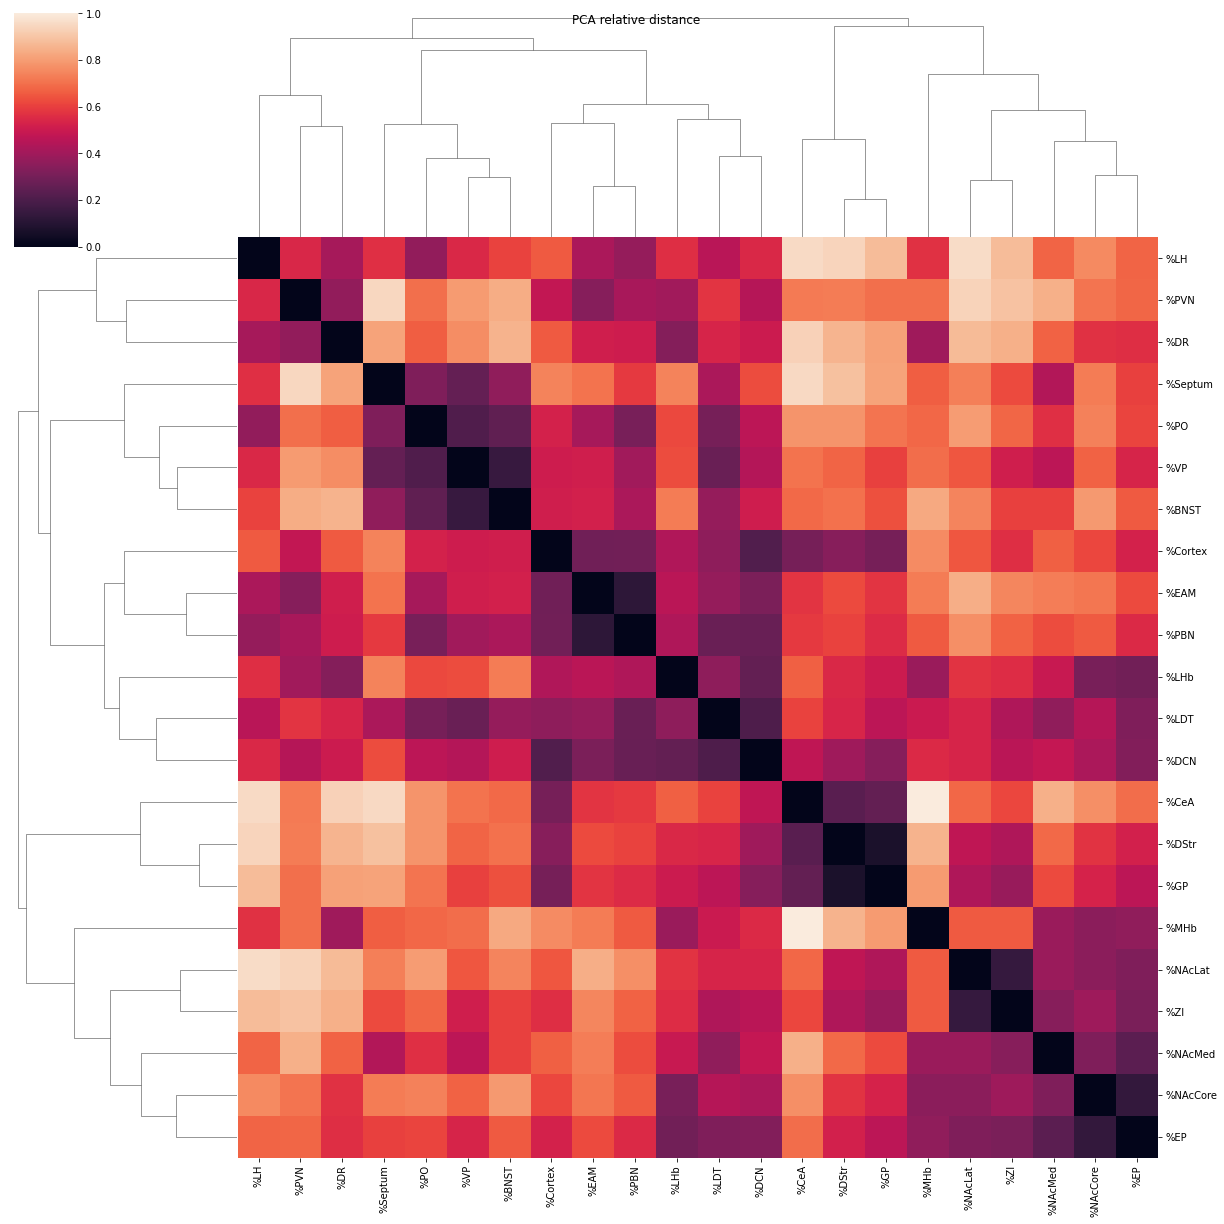

In [16]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")
cm.fig.set_size_inches(18, 18)

### UMAP

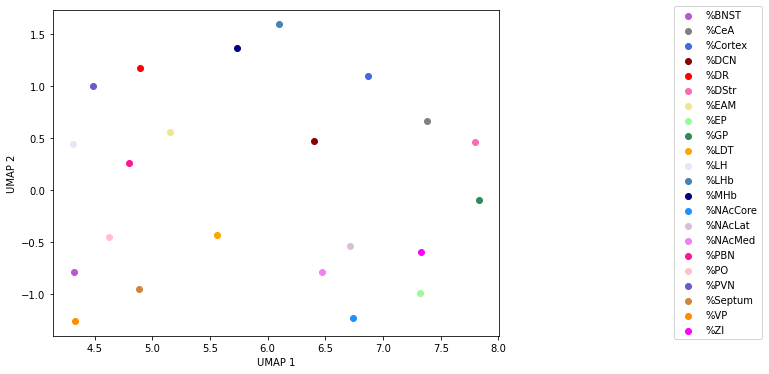

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


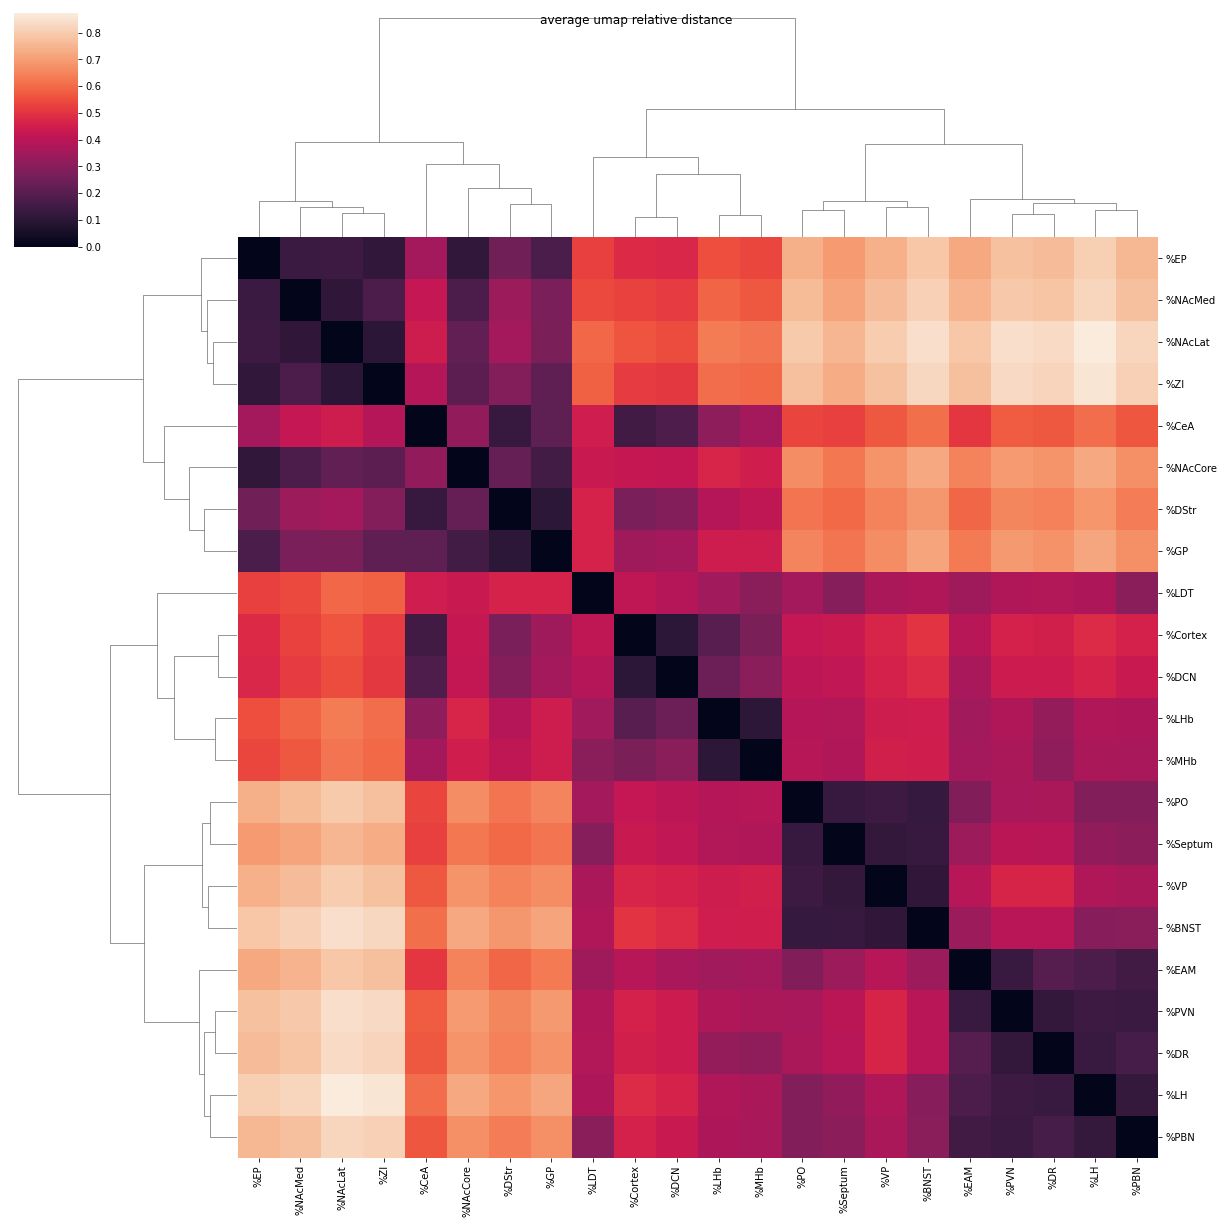

In [17]:
neighbors=int(len(labels)/3)
metrics=set_metric
reducer = umap.UMAP(metric=metrics,n_neighbors=neighbors,random_state=1) 
embedding = reducer.fit_transform(X_scaled)
embedding.shape

align_embed= pd.DataFrame(embedding,index=labels,columns=['umap1','umap2'])
fig, ax = plt.subplots(figsize=(8, 6)) #init  fig
for i,r in enumerate(np.unique(align_embed.index.values)):
    drug1=align_embed[align_embed.index == r]
    ax.scatter(drug1['umap1'],drug1['umap2'],c=uniq_colors[i],label=r)
ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5))
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
plt.savefig('figures/fig3bp_note5in17.svg')
plt.show()

#distance heatmap
to_heatmap=umap_n_times(X_scaled,labels,metric=metrics,n_neighbors=neighbors) 
means_df = pd.DataFrame(to_heatmap,index=labels,columns=labels)
cm = sns.clustermap(means_df,yticklabels=True,xticklabels=True)
cm.fig.suptitle("average umap relative distance")
cm.fig.set_size_inches(18, 18)
plt.savefig('figures/fig3bh_note5in17.svg')

# Drugs Like the Controls

In [18]:
# controldf
# druglikecontroldf
# drugdiffcontroldf
features, labels, regions, condition_nums = get_feats_and_labels(druglikecontroldf)
#scale X 
X=features.to_numpy().astype(float)
#get rid of NAs before scaling 
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0) 

In [19]:
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[3.02944327 1.72813229 1.36722752 1.06726807 1.0340689 ]


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,1.753755,-1.427682,-1.324885,0.779174,-0.438925
1,0.916786,2.047547,0.490187,1.909257,-0.112024
2,0.057811,1.108644,-0.349584,-1.449637,1.888906
3,2.358898,1.961671,2.100911,0.080125,-0.054646
4,3.393765,-0.781613,1.905260,-0.538072,-1.087866
5,-2.349870,-0.467904,0.047672,0.252793,0.747403
6,-1.918856,0.763038,1.466346,-0.487719,-1.055864
7,-1.689045,-1.141831,1.366708,-0.213181,0.248974
8,-1.013149,-0.787636,-1.291173,-0.838207,0.841955
9,-1.170417,-0.435921,-0.455671,1.951094,-1.005516


### PCA plots

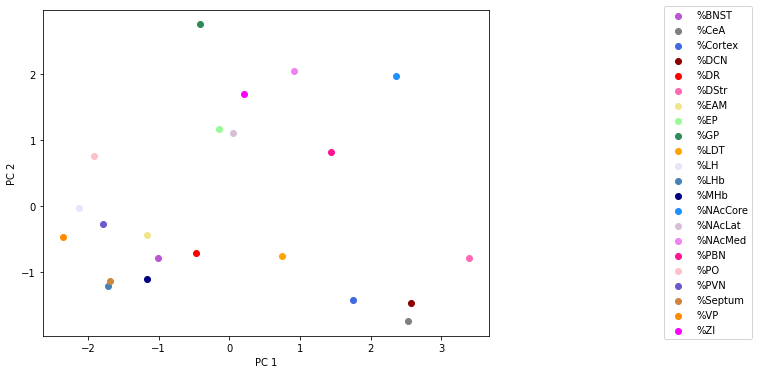

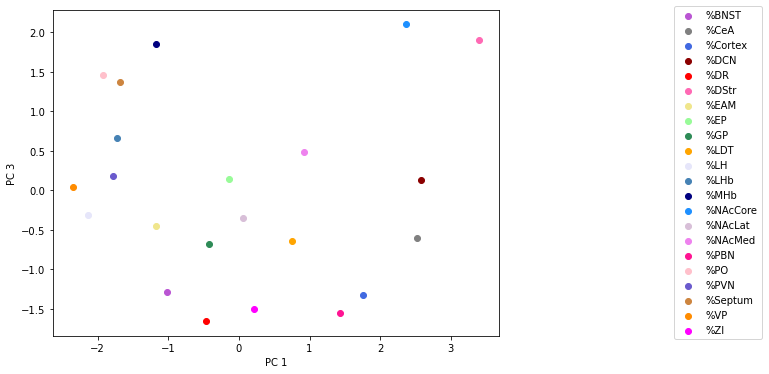

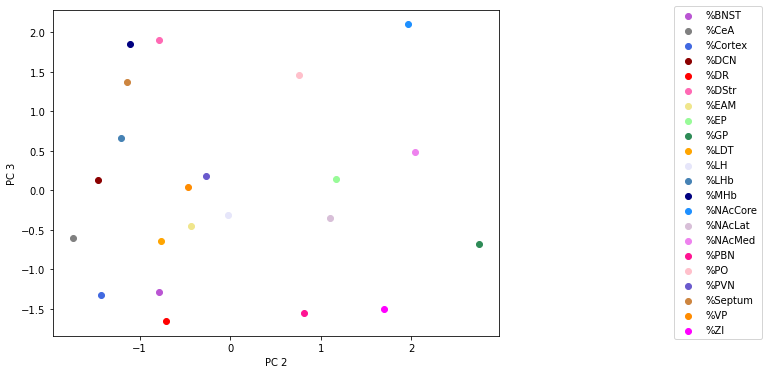

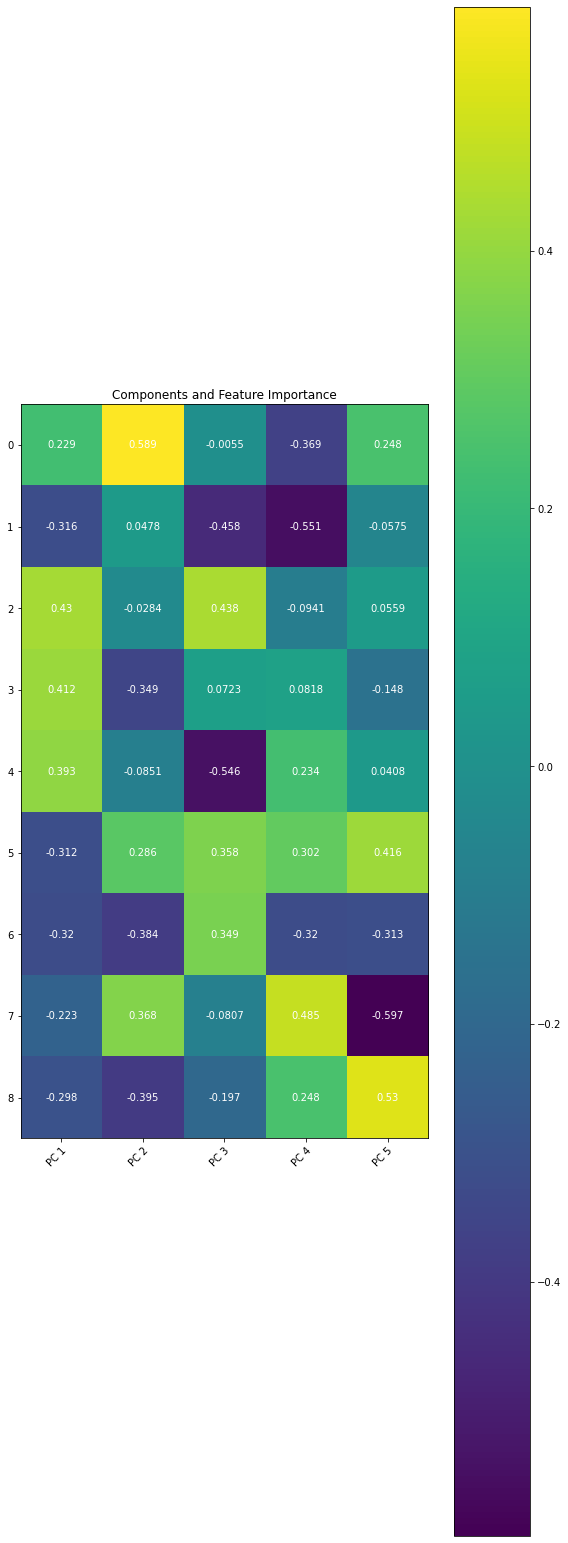

In [20]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


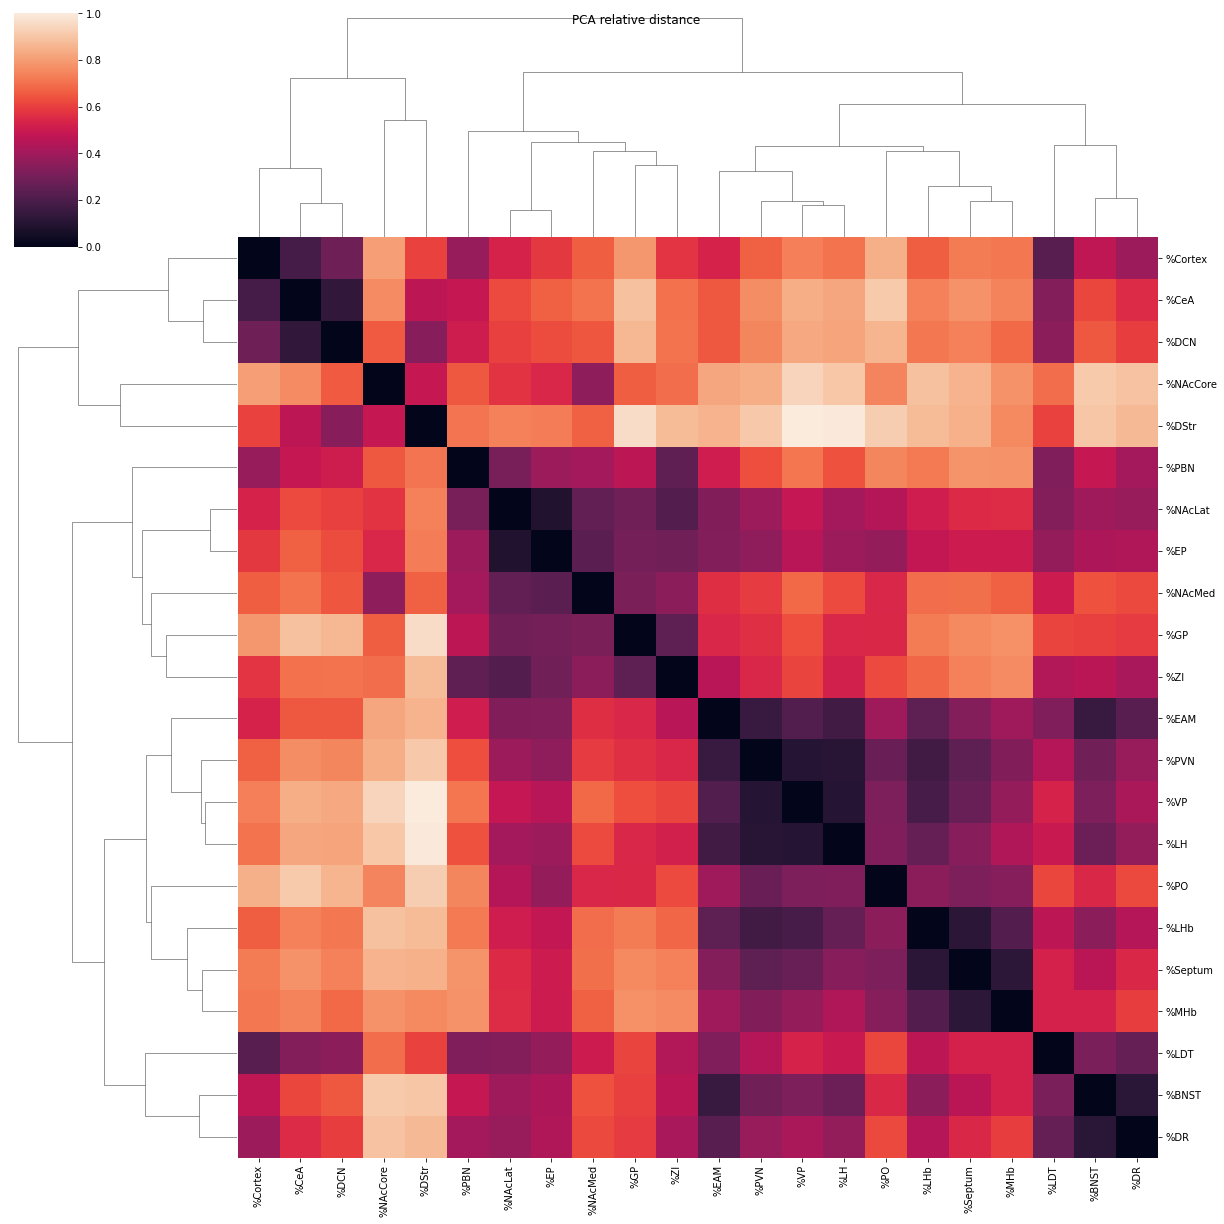

In [21]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")
cm.fig.set_size_inches(18, 18)

### UMAP

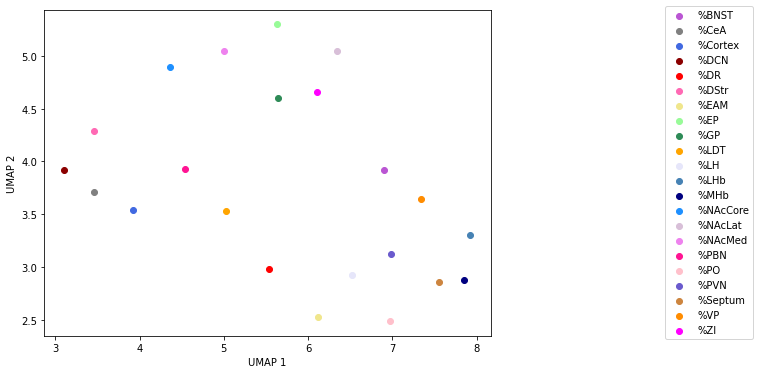

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


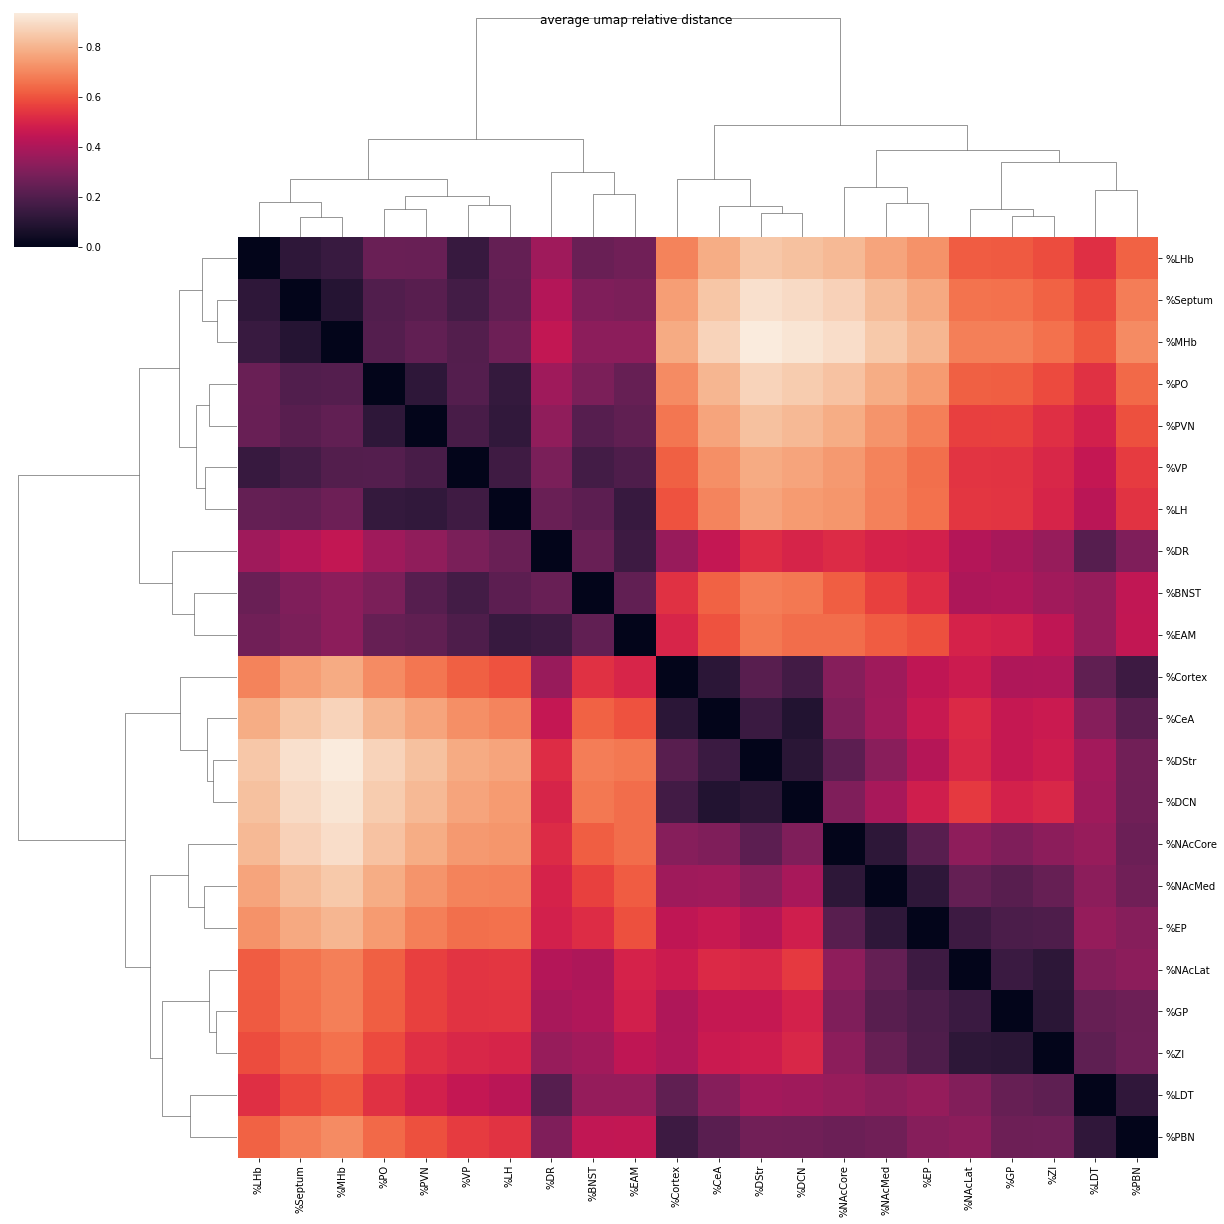

In [22]:
neighbors=int(len(labels)/3)
metrics=set_metric
reducer = umap.UMAP(metric=metrics,n_neighbors=neighbors,random_state=1) 
embedding = reducer.fit_transform(X_scaled)
embedding.shape

align_embed= pd.DataFrame(embedding,index=labels,columns=['umap1','umap2'])
fig, ax = plt.subplots(figsize=(8, 6)) #init  fig
for i,r in enumerate(np.unique(align_embed.index.values)):
    drug1=align_embed[align_embed.index == r]
    ax.scatter(drug1['umap1'],drug1['umap2'],c=uniq_colors[i],label=r)
ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5))
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
plt.savefig('figures/fig3cp_note5in22.svg')
plt.show()

#distance heatmap
to_heatmap=umap_n_times(X_scaled,labels,metric=metrics,n_neighbors=neighbors) 
means_df = pd.DataFrame(to_heatmap,index=labels,columns=labels)
cm = sns.clustermap(means_df,yticklabels=True,xticklabels=True)
cm.fig.suptitle("average umap relative distance")
cm.fig.set_size_inches(18, 18)
plt.savefig('figures/fig3ch_note5in22.svg')

# Drugs Different From the Controls

In [23]:
# controldf
# druglikecontroldf
# drugdiffcontroldf
features, labels, regions, condition_nums = get_feats_and_labels(drugdiffcontroldf)
#scale X 
X=features.to_numpy().astype(float)
#get rid of NAs before scaling 
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0) 

In [24]:
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[8.14160686 4.86958223 4.01313168 3.10274283 2.13467603]


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,2.923463,-1.315234,2.018157,1.706640,1.966759
1,-2.131512,0.069293,-3.277518,-0.732447,-1.789860
2,3.297164,-3.100408,0.016761,-2.270001,0.560313
3,2.552797,-2.424887,-2.797885,-2.823489,-1.428995
4,4.394524,-0.322086,-3.058685,0.998674,0.776311
5,-4.358705,-1.310160,0.853522,0.263517,-0.842771
6,-3.776290,-2.034658,0.181016,0.800362,0.841681
7,-2.564705,-0.699345,-1.684799,0.373031,0.449712
8,0.803706,0.501962,1.136830,2.782067,-1.861146
9,-1.092434,0.478398,1.660719,-2.432100,3.918362


### PCA plots

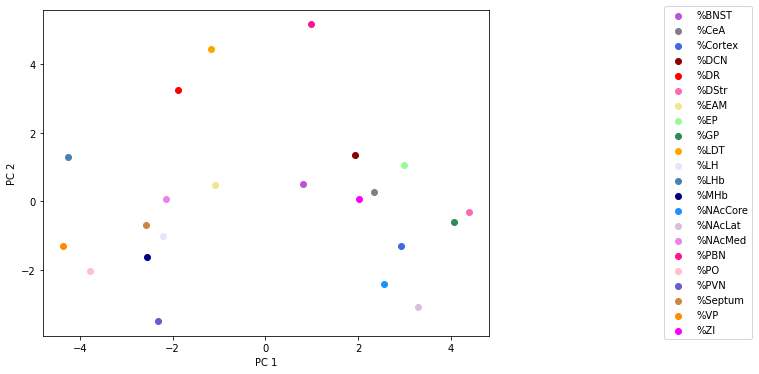

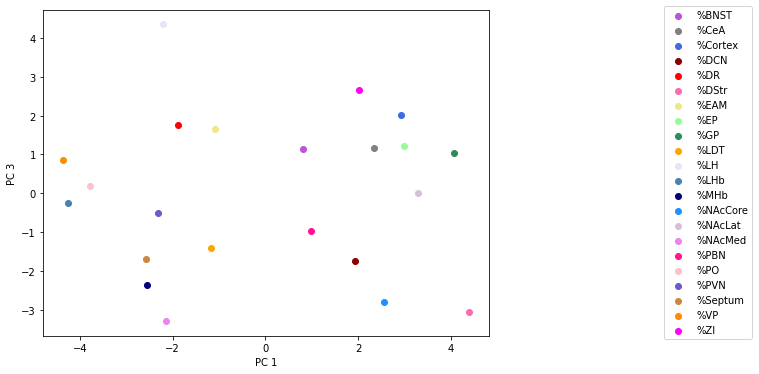

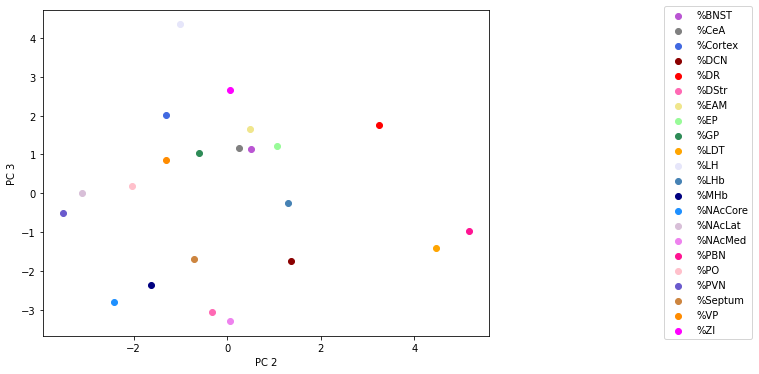

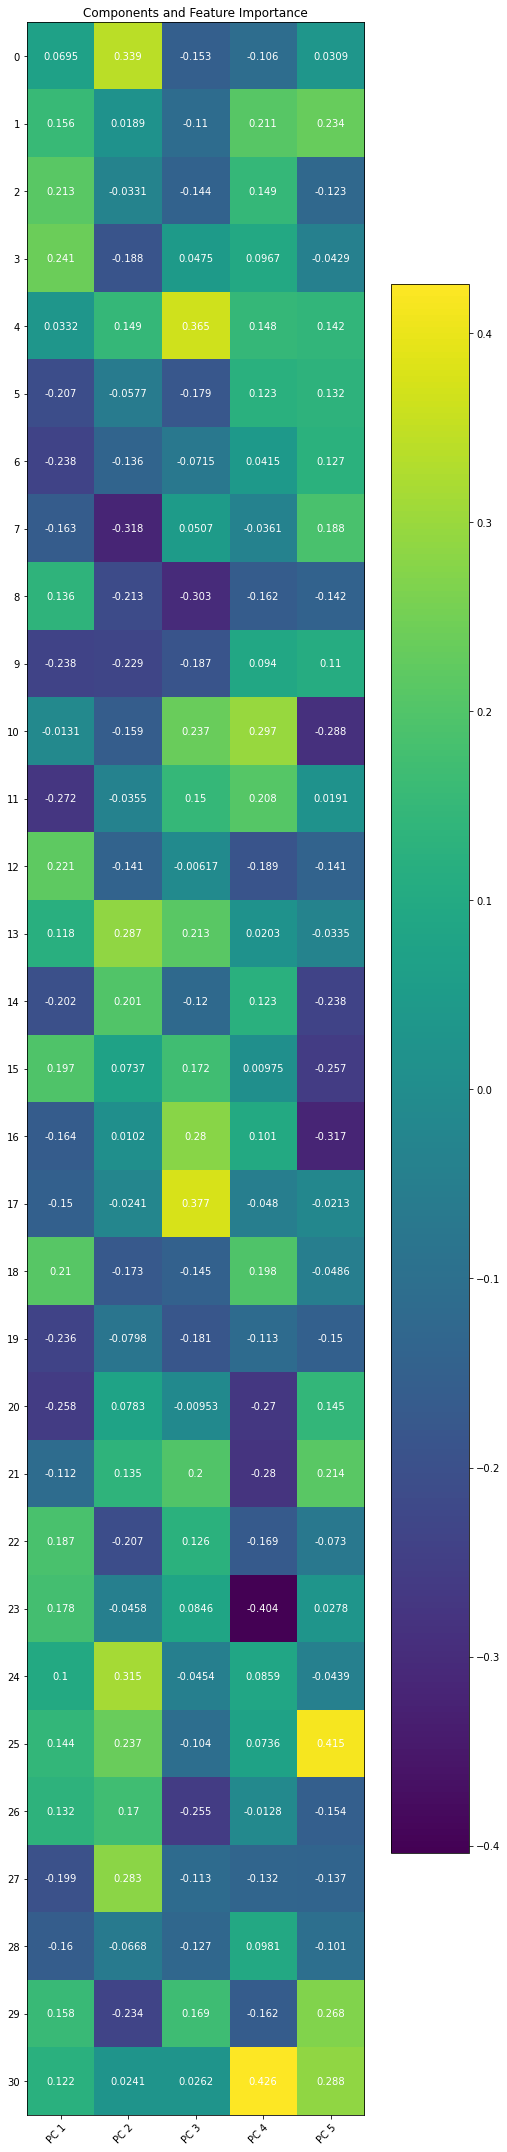

In [25]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


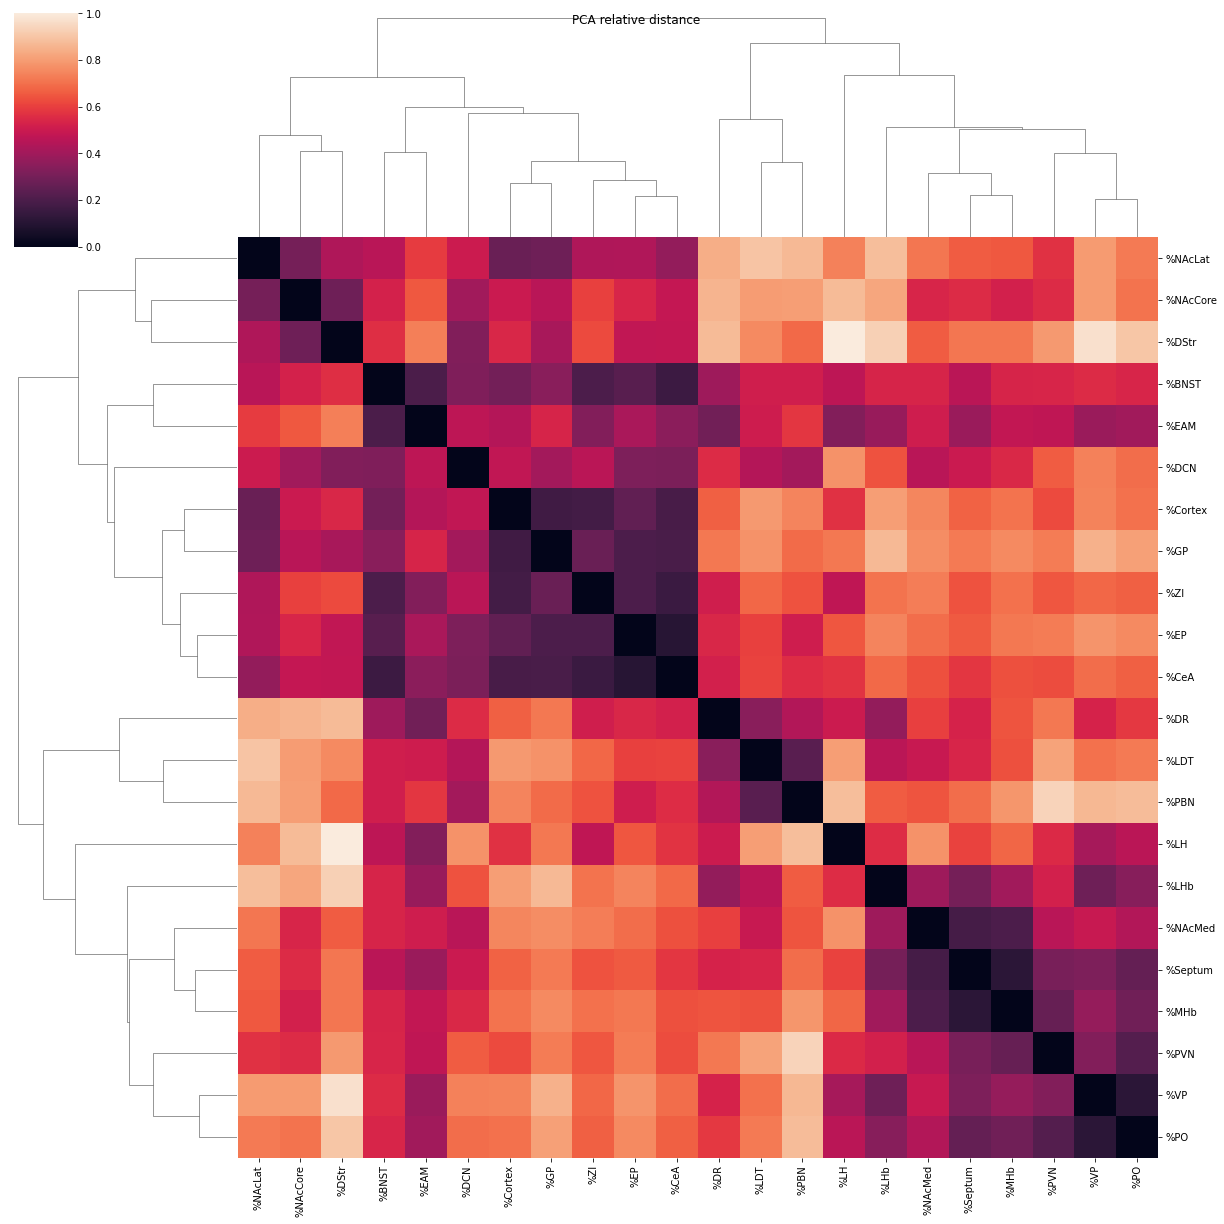

In [26]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")
cm.fig.set_size_inches(18, 18)

### UMAP

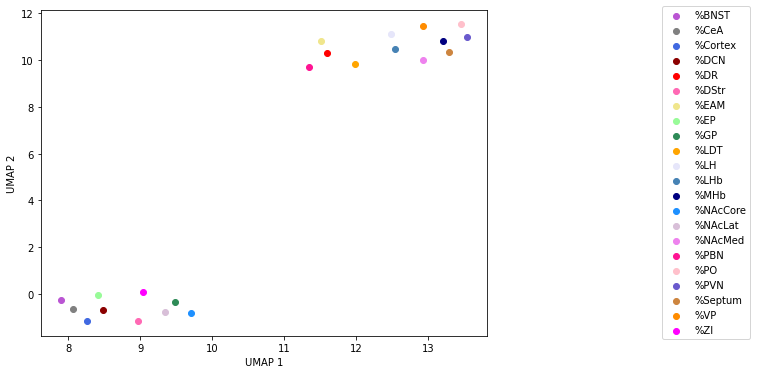

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


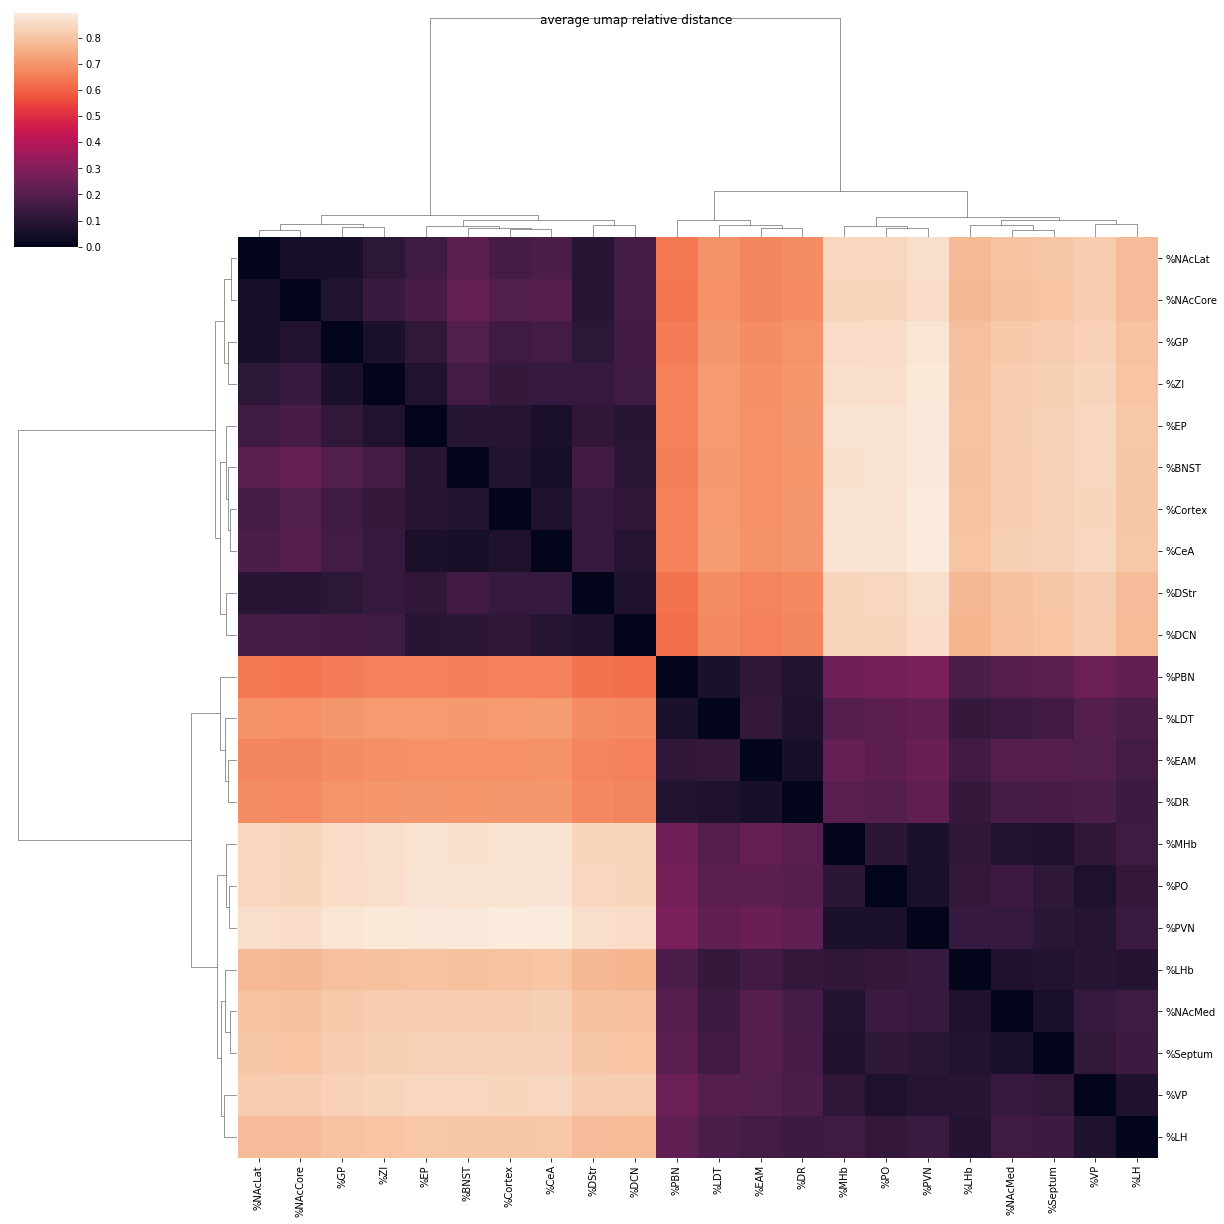

In [27]:
neighbors=int(len(labels)/3)
metrics=set_metric
reducer = umap.UMAP(metric=metrics,n_neighbors=neighbors,random_state=1) 
embedding = reducer.fit_transform(X_scaled)
embedding.shape

align_embed= pd.DataFrame(embedding,index=labels,columns=['umap1','umap2'])
fig, ax = plt.subplots(figsize=(8, 6)) #init  fig
for i,r in enumerate(np.unique(align_embed.index.values)):
    drug1=align_embed[align_embed.index == r]
    ax.scatter(drug1['umap1'],drug1['umap2'],c=uniq_colors[i],label=r)
ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5))
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
plt.savefig('figures/fig3dp_note5in27.svg')
plt.show()

#distance heatmap
to_heatmap=umap_n_times(X_scaled,labels,metric=metrics,n_neighbors=neighbors) 
means_df = pd.DataFrame(to_heatmap,index=labels,columns=labels)
cm = sns.clustermap(means_df,yticklabels=True,xticklabels=True)
cm.fig.suptitle("average umap relative distance")
cm.fig.set_size_inches(18, 18)
plt.savefig('figures/fig3dh_note5in27.svg')